In [ ]:
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, LearningRateScheduler
from time import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib.pyplot import figure

In [ ]:
# Loading the data, splitting up into test and trainign set 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#print(len(train_images), len(test_images))   #checking original sizes 

In [ ]:
# split training data into training and validation
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

In [ ]:
#Setting class names so we can get an overview of the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images[0].shape


(28, 28)

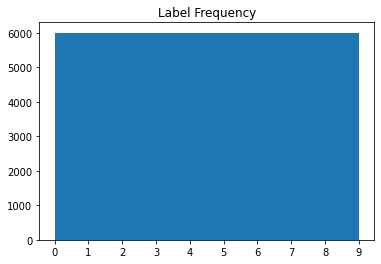

In [ ]:
#Checking label distribution, uniform distribution 
train, test = fashion_mnist.load_data()
data = tf.data.Dataset.from_tensor_slices(train)

vals = np.fromiter(data.map(lambda x, y: y), float)

plt.hist(vals)
plt.xticks(range(10))
plt.title('Label Frequency')
plt.show()

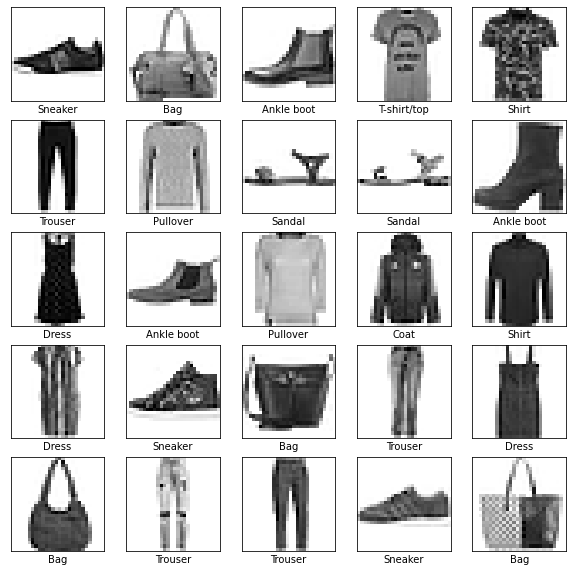

In [ ]:

#Plotting a subset of data with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


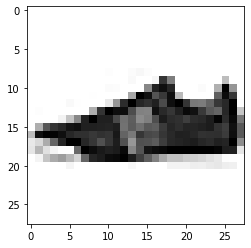

In [ ]:
plt.imshow(train_images[0], cmap=plt.cm.binary)

In [ ]:
#scale to range 0 - 1 
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [ ]:
#display some images
def display_image(position):
    image = train_images[position]
    plt.title('Example %d. Label: %s' % (position, class_names[train_labels[position]]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [ ]:
#display_image(22)

In [ ]:
# explore the data
print('# of training images:', train_images.shape[0])
print('# of validation images:', validation_images.shape[0])
print('# of test images:', test_images.shape[0])

# of training images: 48000
# of validation images: 12000
# of test images: 10000


In [ ]:
print(f"Image shape before: {train_images[0].shape}")

# Pad images with 0s since we want information in the edges, output size should now be 32,32
train_images      = np.pad(train_images, ((0,0),(2,2),(2,2)), 'constant')
validation_images = np.pad(validation_images, ((0,0),(2,2),(2,2)), 'constant')
test_images       = np.pad(test_images, ((0,0),(2,2),(2,2)), 'constant')

print(f"Updated Image Shape: {train_images[0].shape}.")


Image shape before: (28, 28)
Updated Image Shape: (32, 32).


In [ ]:
#Baseline model architecture
bl_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Print model summary
bl_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_4 (Averag  (None, 15, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_5 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [ ]:
#Compile model, use optimiser Adam
bl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Setting number of epochs and batch size
EPOCHS = 15
BATCH_SIZE = 128

#add channel = 1 for greyscale
train_images=train_images[:,:,:,None]
validation_images=validation_images[:,:,:,None]
print("Training images shape: ", train_images.shape)
print("Validation images shape ", validation_images.shape)

X_train, y_train = train_images, to_categorical(train_labels)
X_validation, y_validation = validation_images, to_categorical(validation_labels)



Training images shape:  (48000, 32, 32, 1)
Validation images shape  (12000, 32, 32, 1)


In [ ]:
#Fitting the model, performing training
bl_history=bl_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 21s 52ms/step - loss: 0.8147 - accuracy: 0.7351 - val_loss: 0.6124 - val_accuracy: 0.7883
Epoch 2/15
375/375 [==============================] - 19s 51ms/step - loss: 0.5381 - accuracy: 0.8239 - val_loss: 0.5122 - val_accuracy: 0.8265
Epoch 3/15
375/375 [==============================] - 19s 51ms/step - loss: 0.4800 - accuracy: 0.8442 - val_loss: 0.4655 - val_accuracy: 0.8533
Epoch 4/15
375/375 [==============================] - 19s 51ms/step - loss: 0.4425 - accuracy: 0.8567 - val_loss: 0.4429 - val_accuracy: 0.8499
Epoch 5/15
375/375 [==============================] - 19s 50ms/step - loss: 0.4161 - accuracy: 0.8649 - val_loss: 0.4117 - val_accuracy: 0.8684
Epoch 6/15
375/375 [==============================] - 21s 56ms/step - loss: 0.3947 - accuracy: 0.8715 - val_loss: 0.4003 - val_accuracy: 0.8721
Epoch 7/15
375/375 [==============================] - 19s 51ms/step - loss: 0.3814 - accuracy: 0.8745 - val_loss: 0.3910 - val_accuracy:

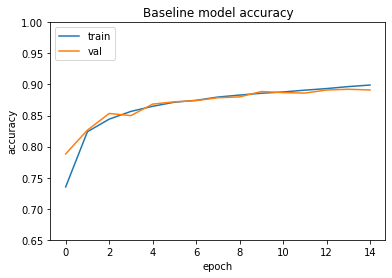

In [ ]:
#Plotting the accuracy baseline model
plt.plot(bl_history.history['accuracy'])
plt.plot(bl_history.history['val_accuracy'])
plt.title('Baseline model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

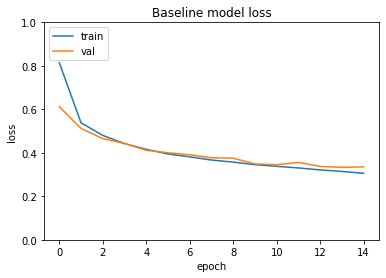

In [ ]:
#Plotting the loss for baseline model
plt.plot(bl_history.history['loss'])
plt.plot(bl_history.history['val_loss'])
plt.title('Baseline model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

In [ ]:
#Printing the val & training loss and accuracy for baseline model 
print(f"Baseline model training accuracy: {bl_history.history['accuracy'][-1]} and validation accuracy: {bl_history.history['val_accuracy'][-1]}")
print(f"Baseline model training loss: {bl_history.history['loss'][-1]} and validation loss: {bl_history.history['val_loss'][-1]}")

Baseline model training accuracy: 0.8990833163261414 and validation accuracy: 0.8911666870117188
Baseline model training loss: 0.305769681930542 and validation loss: 0.33531472086906433


In [ ]:
#Save weights of model
bl_model.save_weights("bl_model")

In [ ]:
#Model2 DropOut model architecture
dropout_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),                       
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])
dropout_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 15, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout (Dropout)           (None, 15, 15, 6)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 16)         

In [ ]:
#Compile and fit model
dropout_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dropout_history=dropout_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 22s 56ms/step - loss: 0.8916 - accuracy: 0.6916 - val_loss: 0.6108 - val_accuracy: 0.7853
Epoch 2/15
375/375 [==============================] - 21s 55ms/step - loss: 0.6167 - accuracy: 0.7848 - val_loss: 0.5235 - val_accuracy: 0.8216
Epoch 3/15
375/375 [==============================] - 22s 57ms/step - loss: 0.5523 - accuracy: 0.8085 - val_loss: 0.4869 - val_accuracy: 0.8343
Epoch 4/15
375/375 [==============================] - 21s 56ms/step - loss: 0.5147 - accuracy: 0.8225 - val_loss: 0.4533 - val_accuracy: 0.8547
Epoch 5/15
375/375 [==============================] - 21s 56ms/step - loss: 0.4896 - accuracy: 0.8307 - val_loss: 0.4347 - val_accuracy: 0.8531
Epoch 6/15
375/375 [==============================] - 21s 57ms/step - loss: 0.4709 - accuracy: 0.8367 - val_loss: 0.4180 - val_accuracy: 0.8600
Epoch 7/15
375/375 [==============================] - 21s 57ms/step - loss: 0.4542 - accuracy: 0.8422 - val_loss: 0.4065 - val_accuracy:

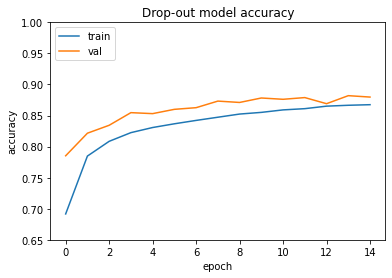

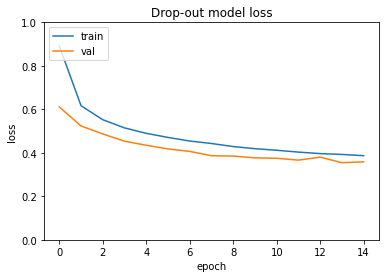

Dropout model training accuracy: 0.867479145526886 and validation accuracy: 0.8797500133514404
Dropout model training loss: 0.38681110739707947 and validation loss: 0.35838818550109863


In [ ]:
#Plotting the accuracy of dropout model
plt.plot(dropout_history.history['accuracy'])
plt.plot(dropout_history.history['val_accuracy'])
plt.title('Drop-out model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of dropout model
plt.plot(dropout_history.history['loss'])
plt.plot(dropout_history.history['val_loss'])
plt.title('Drop-out model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of dropout model
print(f"Dropout model training accuracy: {dropout_history.history['accuracy'][-1]} and validation accuracy: {dropout_history.history['val_accuracy'][-1]}")
print(f"Dropout model training loss: {dropout_history.history['loss'][-1]} and validation loss: {dropout_history.history['val_loss'][-1]}")

In [ ]:
#Saving weights of dropout model
dropout_model.save_weights("dropout_model")

In [ ]:
#Model3 MaxPooling model architecture
maxpool_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

maxpool_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [ ]:
#Compiling and fitting Maxpool model
maxpool_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
maxpool_history=maxpool_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 26s 69ms/step - loss: 0.3375 - accuracy: 0.8914 - val_loss: 0.3546 - val_accuracy: 0.8854
Epoch 2/15
375/375 [==============================] - 25s 67ms/step - loss: 0.3253 - accuracy: 0.8947 - val_loss: 0.3359 - val_accuracy: 0.8953
Epoch 3/15
375/375 [==============================] - 23s 61ms/step - loss: 0.3090 - accuracy: 0.9016 - val_loss: 0.3359 - val_accuracy: 0.8934
Epoch 4/15
375/375 [==============================] - 23s 61ms/step - loss: 0.3002 - accuracy: 0.9028 - val_loss: 0.3293 - val_accuracy: 0.8961
Epoch 5/15
375/375 [==============================] - 23s 61ms/step - loss: 0.2891 - accuracy: 0.9070 - val_loss: 0.3171 - val_accuracy: 0.9028
Epoch 6/15
375/375 [==============================] - 23s 62ms/step - loss: 0.2844 - accuracy: 0.9080 - val_loss: 0.3310 - val_accuracy: 0.8915
Epoch 7/15
375/375 [==============================] - 22s 60ms/step - loss: 0.2774 - accuracy: 0.9092 - val_loss: 0.3090 - val_accuracy:

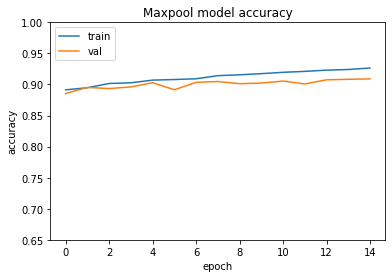

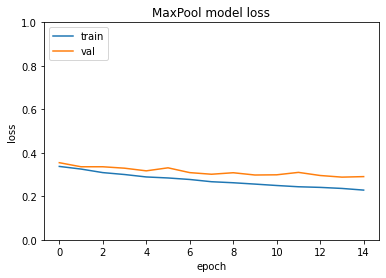

Maxpool model training accuracy: 0.9265000224113464 and validation accuracy: 0.9089999794960022
Maxpool model training loss: 0.22855298221111298 and validation loss: 0.2905918061733246


In [ ]:
#Plotting the accuracy of maxpool model
plt.plot(maxpool_history.history['accuracy'])
plt.plot(maxpool_history.history['val_accuracy'])
plt.title('Maxpool model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of maxpool model
plt.plot(maxpool_history.history['loss'])
plt.plot(maxpool_history.history['val_loss'])
plt.title('MaxPool model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of maxpool model
print(f"Maxpool model training accuracy: {maxpool_history.history['accuracy'][-1]} and validation accuracy: {maxpool_history.history['val_accuracy'][-1]}")
print(f"Maxpool model training loss: {maxpool_history.history['loss'][-1]} and validation loss: {maxpool_history.history['val_loss'][-1]}")

In [ ]:
#Save weights of maxpool model
maxpool_model.save_weights("maxpool_model")

In [ ]:
#Model4 More filters model architecture
filter_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

filter_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 average_pooling2d_8 (Averag  (None, 15, 15, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_9 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_15 (Dense)            (None, 120)              

In [ ]:
#Compile and fit filter model
filter_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
filter_history=filter_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 47s 125ms/step - loss: 0.7748 - accuracy: 0.7614 - val_loss: 0.5518 - val_accuracy: 0.8256
Epoch 2/15
375/375 [==============================] - 47s 125ms/step - loss: 0.4928 - accuracy: 0.8421 - val_loss: 0.4672 - val_accuracy: 0.8528
Epoch 3/15
375/375 [==============================] - 45s 121ms/step - loss: 0.4463 - accuracy: 0.8562 - val_loss: 0.4294 - val_accuracy: 0.8616
Epoch 4/15
375/375 [==============================] - 46s 122ms/step - loss: 0.4110 - accuracy: 0.8675 - val_loss: 0.4106 - val_accuracy: 0.8705
Epoch 5/15
375/375 [==============================] - 45s 121ms/step - loss: 0.3906 - accuracy: 0.8740 - val_loss: 0.3880 - val_accuracy: 0.8767
Epoch 6/15
375/375 [==============================] - 45s 120ms/step - loss: 0.3708 - accuracy: 0.8806 - val_loss: 0.3698 - val_accuracy: 0.8828
Epoch 7/15
375/375 [==============================] - 46s 121ms/step - loss: 0.3622 - accuracy: 0.8826 - val_loss: 0.3592 - val_ac

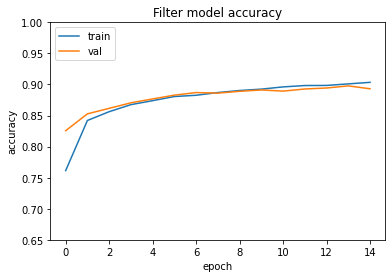

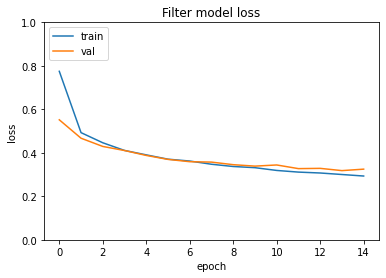

Filter model training accuracy: 0.9034583568572998 and validation accuracy: 0.8930833339691162
Filter model training loss: 0.29330775141716003 and validation loss: 0.3248997628688812


In [ ]:
#Plotting the accuracy of filter model
plt.plot(filter_history.history['accuracy'])
plt.plot(filter_history.history['val_accuracy'])
plt.title('Filter model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of filter model
plt.plot(filter_history.history['loss'])
plt.plot(filter_history.history['val_loss'])
plt.title('Filter model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of filter model
print(f"Filter model training accuracy: {filter_history.history['accuracy'][-1]} and validation accuracy: {filter_history.history['val_accuracy'][-1]}")
print(f"Filter model training loss: {filter_history.history['loss'][-1]} and validation loss: {filter_history.history['val_loss'][-1]}")

In [ ]:
#Saving weights of filter model
filter_model.save_weights("filter_model")

In [ ]:
#Model5 1 more convolutional layer model architecture
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),   
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                   
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

conv_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_10 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_11 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 average_pooling2d_12 (Avera  (None, 2, 2, 32)        

In [ ]:
#Compiling and fitting conv model
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
conv_history=conv_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 21s 55ms/step - loss: 1.0534 - accuracy: 0.6644 - val_loss: 0.7899 - val_accuracy: 0.7337
Epoch 2/15
375/375 [==============================] - 20s 55ms/step - loss: 0.7585 - accuracy: 0.7430 - val_loss: 0.7391 - val_accuracy: 0.7473
Epoch 3/15
375/375 [==============================] - 20s 54ms/step - loss: 0.6955 - accuracy: 0.7593 - val_loss: 0.6865 - val_accuracy: 0.7703
Epoch 4/15
375/375 [==============================] - 20s 54ms/step - loss: 0.6489 - accuracy: 0.7779 - val_loss: 0.6226 - val_accuracy: 0.7893
Epoch 5/15
375/375 [==============================] - 20s 54ms/step - loss: 0.6162 - accuracy: 0.7925 - val_loss: 0.6143 - val_accuracy: 0.7911
Epoch 6/15
375/375 [==============================] - 20s 54ms/step - loss: 0.5901 - accuracy: 0.8026 - val_loss: 0.5967 - val_accuracy: 0.7959
Epoch 7/15
110/375 [=======>......................] - ETA: 12s - loss: 0.5745 - accuracy: 0.8107

KeyboardInterrupt: ignored

In [ ]:
#Plotting the accuracy of conv model
plt.plot(conv_history.history['accuracy'])
plt.plot(conv_history.history['val_accuracy'])
plt.title('Extra convolution model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of conv model
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['val_loss'])
plt.title('Extra convolution model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of conv model
print(f"Extra convolution model training accuracy: {conv_history.history['accuracy'][-1]} and validation accuracy: {conv_history.history['val_accuracy'][-1]}")
print(f"Extra convolution model training loss: {conv_history.history['loss'][-1]} and validation loss: {conv_history.history['val_loss'][-1]}")

In [ ]:
#Saving weights of conv model
conv_model.save_weights("conv_model")

In [ ]:
#Learningrate decay model architecture
lr_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


lr_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_6 (Averag  (None, 15, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_7 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [ ]:
"""Schedule function to reduce the learning rate to half every 5 epochs"""

def scheduler(epoch, lr):
  if epoch > 0 and (epoch % 5 == 0):
    return lr * 0.5
  else:
    return lr

#Create callback for adapting learning rate
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)

In [ ]:
"""Set initial learningrate to 0.1, use SGD here instead of Adam as Adam has internal learning rate management that is not compatible with most learning rate schedules"""
opt = tf.keras.optimizers.SGD(learning_rate=0.1) #Can also try with 0.01
lr_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lr_history=lr_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation), callbacks=[callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 1/15
375/375 [==============================] - 22s 56ms/step - loss: 0.9892 - accuracy: 0.6714 - val_loss: 0.6732 - val_accuracy: 0.7631 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 2/15
375/375 [==============================] - 20s 53ms/step - loss: 0.6206 - accuracy: 0.7820 - val_loss: 0.5506 - val_accuracy: 0.8130 - lr: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 3/15
375/375 [==============================] - 19s 51ms/step - loss: 0.5466 - accuracy: 0.8099 - val_loss: 0.5092 - val_accuracy: 0.8282 - lr: 0.1000

Epoch 4: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 4/15
375/375 [==============================] - 19s 51ms/step - loss: 0.5082 - accuracy: 0.8261 - val_loss: 0.5317 - val_accuracy: 0.8194 - lr: 0.1000

Epoch 5: LearningRateScheduler setting learning rate to 0.1

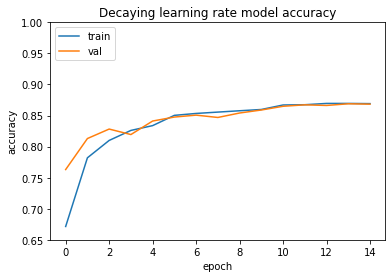

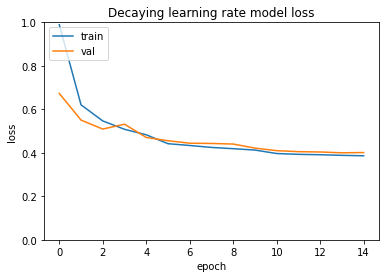

Decaying lr model training accuracy: 0.8692083358764648 and validation accuracy: 0.8683333396911621
Decaying lr model training loss: 0.3864079713821411 and validation loss: 0.4012795388698578


In [ ]:
#Plotting the accuracy for lr_model
plt.plot(lr_history.history['accuracy'])
plt.plot(lr_history.history['val_accuracy'])
plt.title('Decaying learning rate model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss for lr_model
plt.plot(lr_history.history['loss'])
plt.plot(lr_history.history['val_loss'])
plt.title('Decaying learning rate model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy 
print(f"Decaying lr model training accuracy: {lr_history.history['accuracy'][-1]} and validation accuracy: {lr_history.history['val_accuracy'][-1]}")
print(f"Decaying lr model training loss: {lr_history.history['loss'][-1]} and validation loss: {lr_history.history['val_loss'][-1]}")

In [ ]:
#save learning rate model
lr_model.save_weights("lr_model")

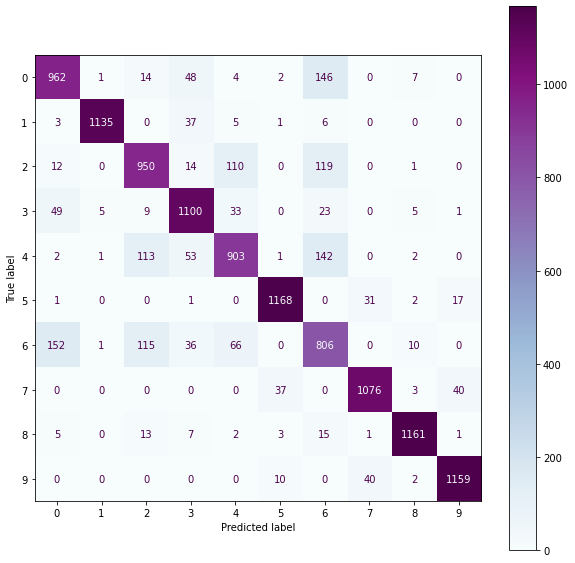

In [ ]:
#Make confusion matrix with scikitlearn that shows number of images classified correctly and incorrectly
y_pred = lr_model.predict(validation_images)
y_true = validation_labels             
y_pred_class = np.argmax(y_pred, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(validation_labels, y_pred_class, cmap="BuPu", ax=ax)  #BuPu, pink_r, PuBu, binary, Greens, CMRmap_r
plt.show()

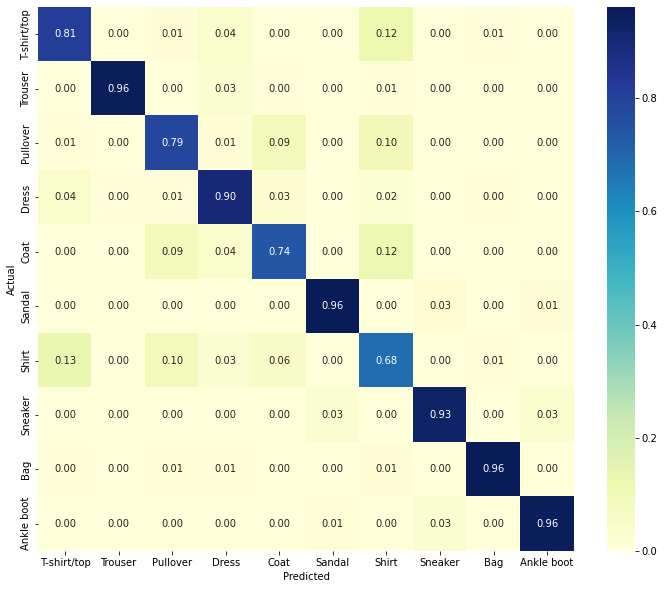

In [ ]:
#Normalised heatmap using seaborn that shows percentage of correctly classified (and missclassified) labels
cm = confusion_matrix(validation_labels, y_pred_class)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu") #YlGnBu, Blues, CMRmap_r, pink_r, binary, BuPu, PuBu, Reds
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
#Take arbitrary image and add empty dimension to fit input
img = train_images[0][None,:,:,:]

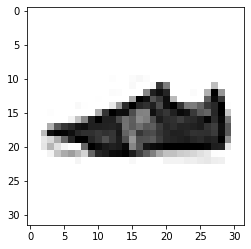

In [ ]:
#Display Image (x=32, y=32 since we have padding)
plt.imshow(img.reshape((32,32)), cmap=plt.cm.binary)

The shape of the conv2d_8 is =======>> (1, 30, 30, 6)
The shape of the average_pooling2d_6 is =======>> (1, 15, 15, 6)
The shape of the conv2d_9 is =======>> (1, 13, 13, 16)
The shape of the average_pooling2d_7 is =======>> (1, 6, 6, 16)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


The shape of the flatten_4 is =======>> (1, 576)
The shape of the dense_12 is =======>> (1, 120)
The shape of the dense_13 is =======>> (1, 84)
The shape of the dense_14 is =======>> (1, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


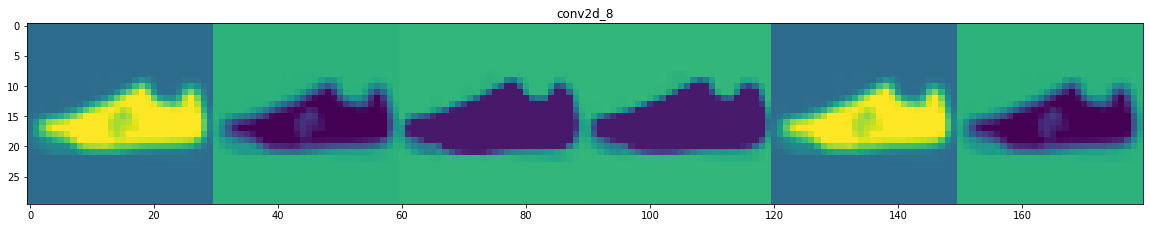

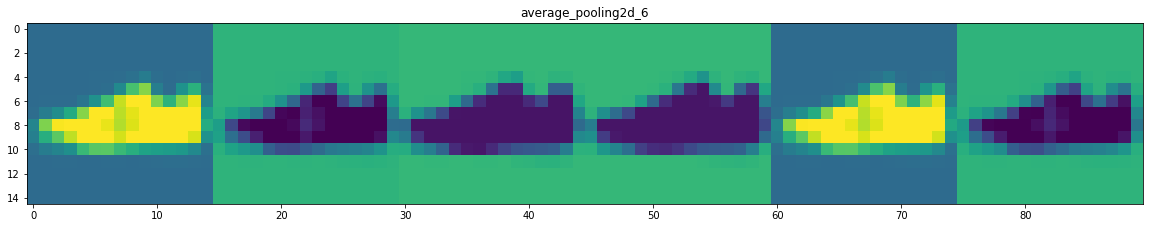

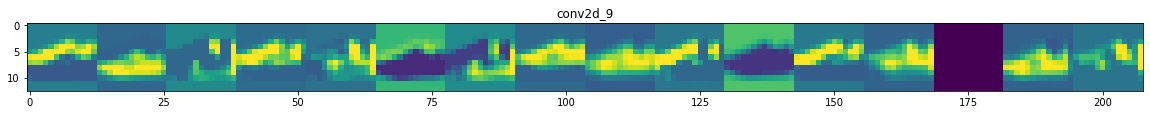

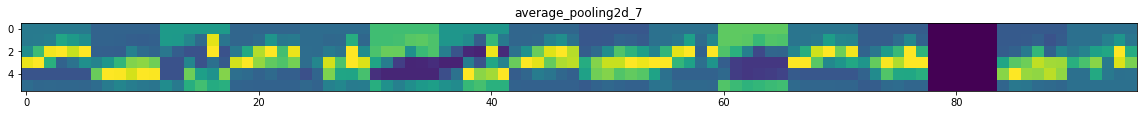

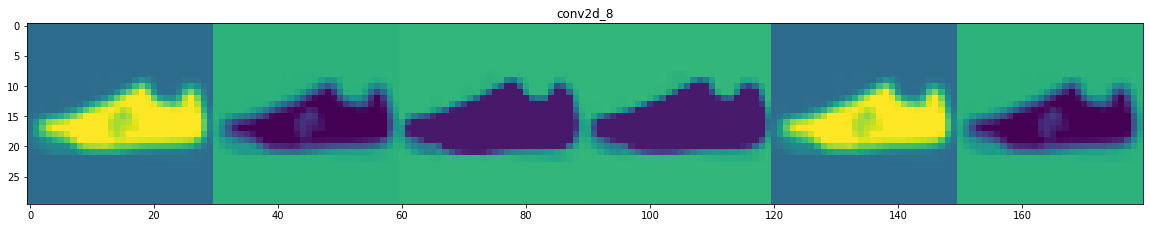

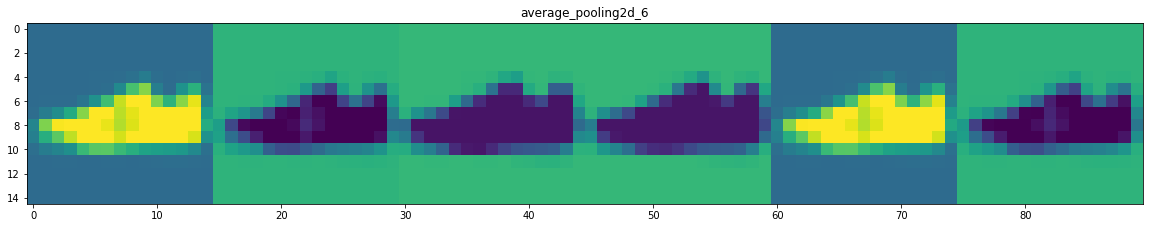

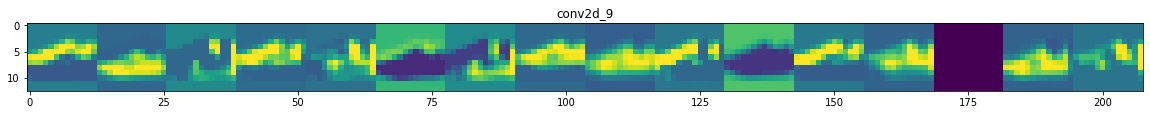

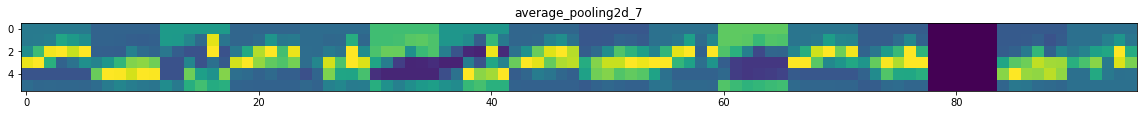

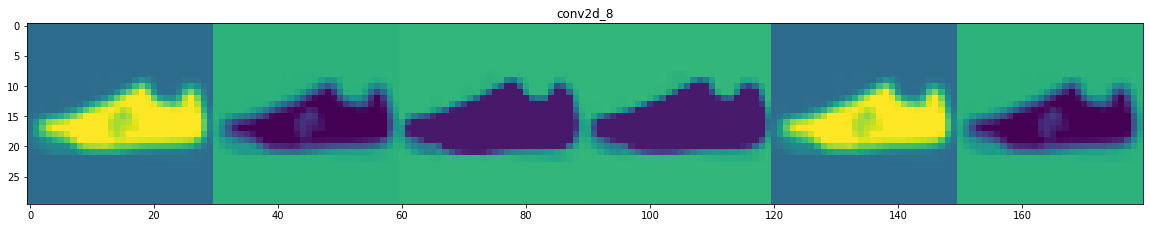

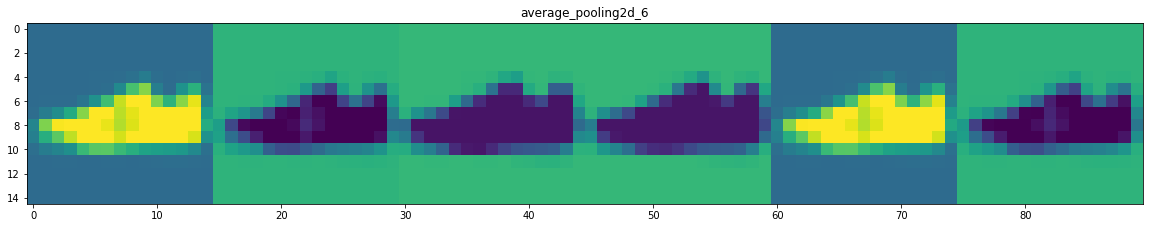

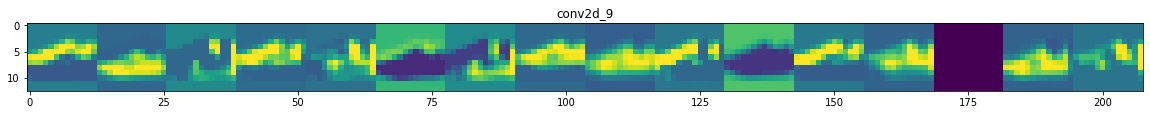

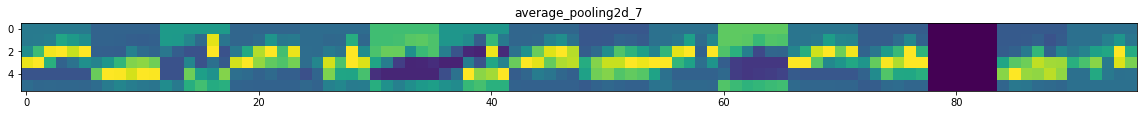

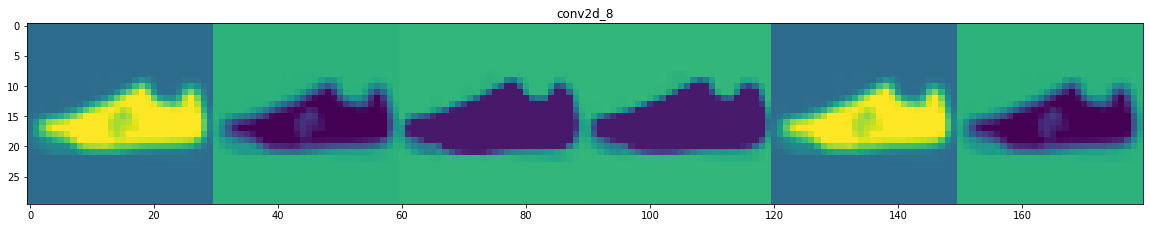

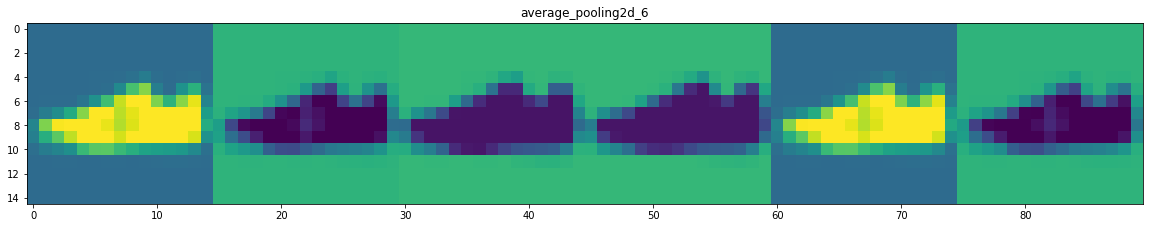

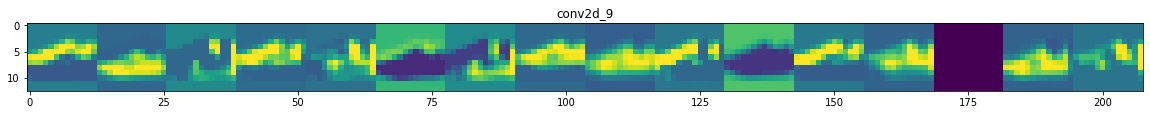

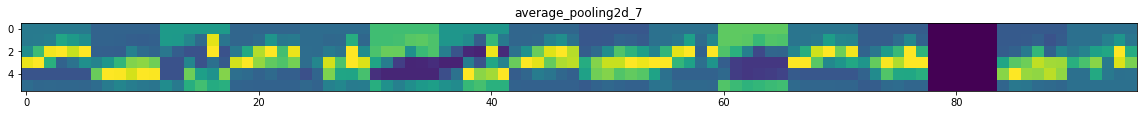

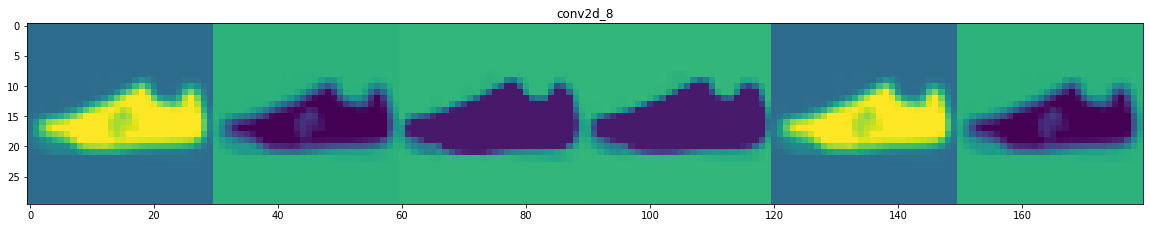

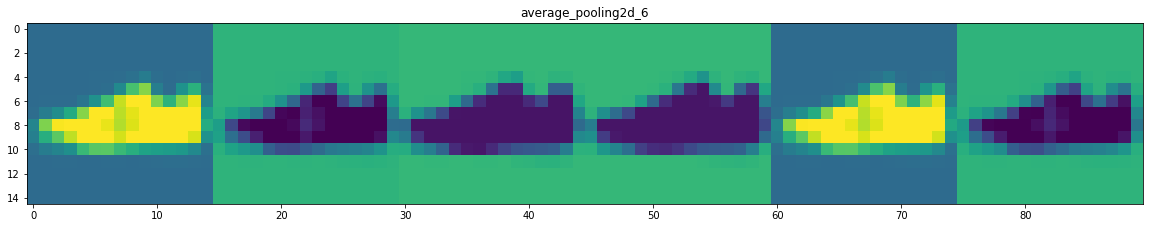

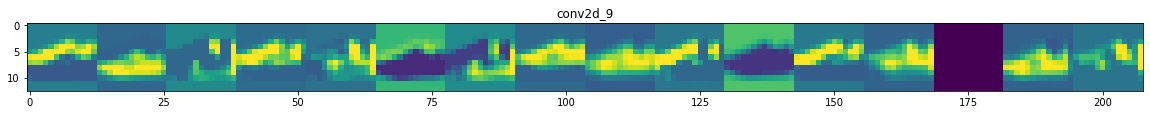

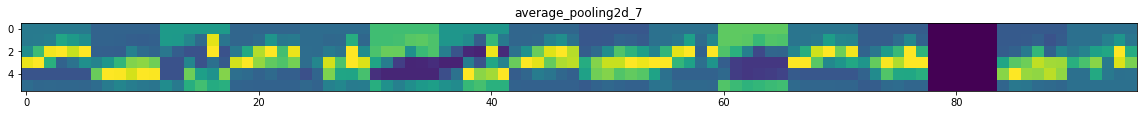

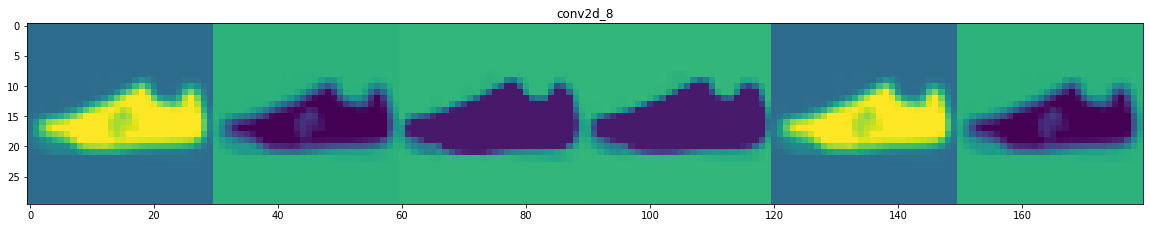

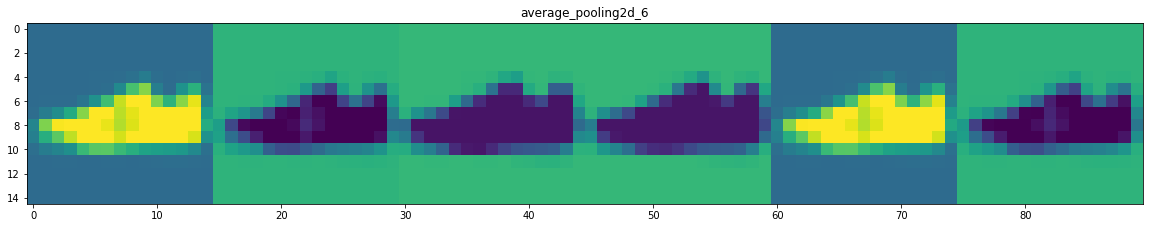

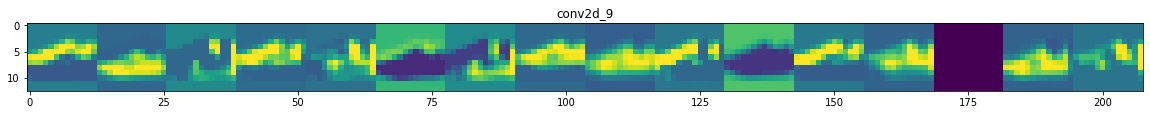

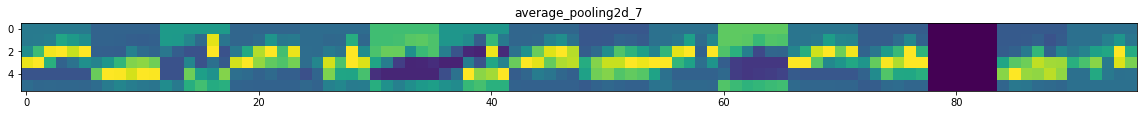

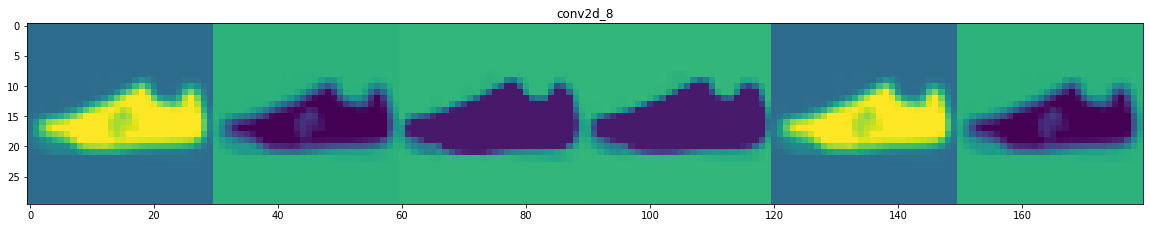

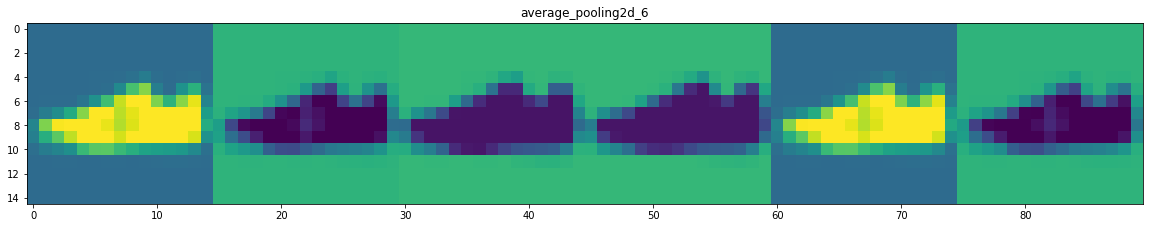

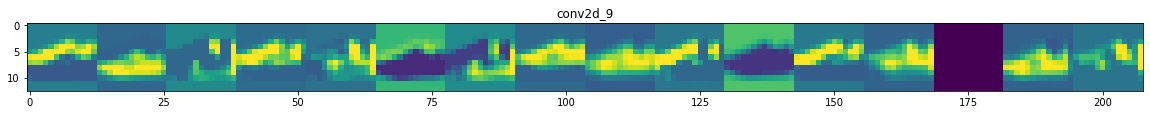

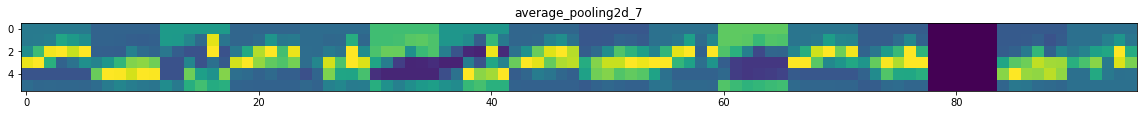

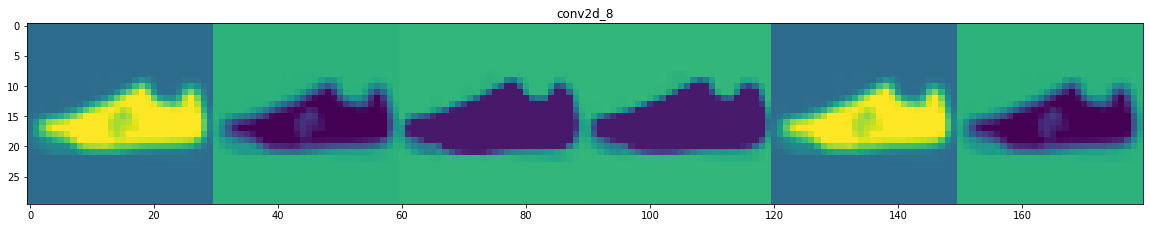

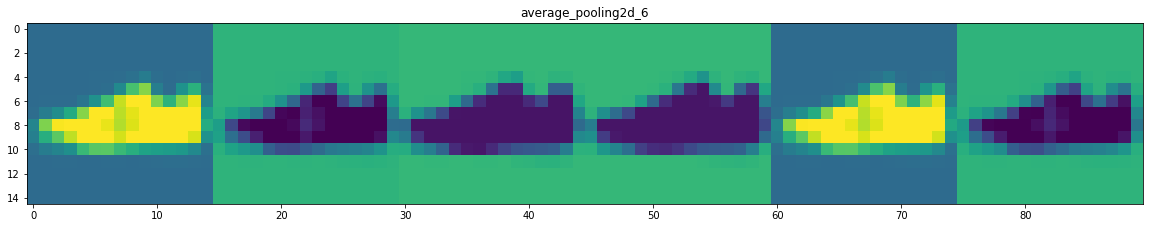

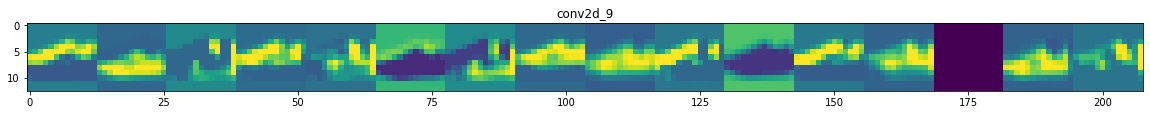

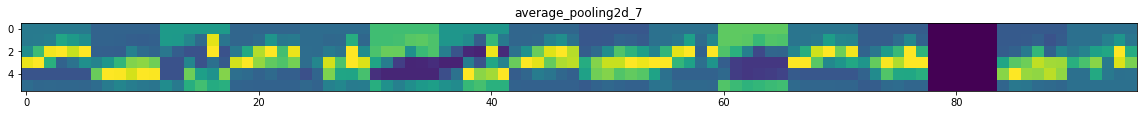

In [ ]:
"""Building visualisation for output layers"""

#Get the name of the layers
layer_names = [layer.name for layer in lr_model.layers]

#print(lr_model.layers) #Checking the different layers
layer_outputs = [layer.output for layer in lr_model.layers] #Create list of the outputs for all layers
visualisation_model = tf.keras.models.Model(inputs=lr_model.input, outputs=layer_outputs) #Creating a model for visualisation with the same input as analysed model and output all the intermediate layers of model


feature_maps = visualisation_model.predict(img) #pass image into the visualisation model to get the feature maps

for layer_name, feature_map in zip(layer_names, feature_maps):
  print(f"The shape of the {layer_name} is =======>> {feature_map.shape}") #Print shape of each feature map for each output layer

  for layer_name, feature_map in zip(layer_names, feature_maps):   
    if len(feature_map.shape) == 4: #this makes sure we only get output from convolutional layers
      feature_dim = feature_map.shape[-1]  #Getting the number of feature dimensions for a featuremap of each layer
      size = feature_map.shape[1] 
      image_grid = np.zeros((size,size* feature_dim))  
      #img_array = []
      for i in range(feature_dim):   #iterate over a feature map of a layer and separate all feature images. 
        img = feature_map[0, :, :, i]
        img -= img.mean()
        img /= img.std ()
        img *=  64
        img += 128
        img = np.clip(img, 0, 255).astype('uint8')
        #img_array.append(img)

      #for i in img_array:  
        image_grid[:, i * size : (i + 1) * size] += img

      scale = 20. / feature_dim
      plt.figure( figsize=(scale * feature_dim, scale) )
      plt.title ( layer_name )
      plt.grid  ( False )
      plt.imshow(image_grid, aspect='auto')

In [ ]:
#Test Best Model 1 - based on accuracy: MaxPooling
score = maxpool_model.evaluate(test_images, to_categorical(test_labels))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.3055 - accuracy: 0.9040
Test loss: 0.3055451512336731
Test accuracy: 0.9039999842643738


In [ ]:
#Test Best Model 2 - based on accuracy: Filter
score = filter_model.evaluate(test_images, to_categorical(test_labels))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.3415 - accuracy: 0.8858
Test loss: 0.3415353298187256
Test accuracy: 0.8858000040054321
